In [0]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
!git clone https://github.com/dopplerchase/ATMS-597-SP-2020.git

fatal: destination path 'ATMS-597-SP-2020' already exists and is not an empty directory.


# Import and clean data

In [0]:
rain = pd.read_csv('./ATMS-597-SP-2020/ATMS-597-SP-2020-Project-5/RAIN_KIMT.csv')
snow = pd.read_csv('./ATMS-597-SP-2020/ATMS-597-SP-2020-Project-5/SNOW_KIMT.csv')

data = pd.concat([rain,snow])
data.tail()

,Unnamed: 0,wind_direction,wind_speed,air_temperature,dew_point_temperature,present_weather,sea_level_pressure,pressure,wet_bulb
61084,2019-12-12 20:35:00,50.0,5.0,-8.0,-11.0,75.0,1018.687951,973.896171,-8.797526
61085,2019-12-12 20:40:00,50.0,5.0,-8.0,-11.0,75.0,1018.687951,973.896171,-8.797526
61086,2019-12-12 20:45:00,40.0,7.0,-8.0,-11.0,75.0,1018.687951,973.896171,-8.797526
61087,2019-12-12 21:20:00,350.0,4.0,-8.0,-11.0,75.0,1018.345457,973.568736,-8.797719
61088,2019-12-12 21:25:00,330.0,4.0,-8.0,-11.0,75.0,1018.345457,973.568736,-8.797719


In [0]:
# Check which present weather codes are in our data
data['present_weather'].value_counts()

71.0    56886
61.0    51738
63.0     5196
73.0     3725
65.0     1225
66.0      829
75.0      478
67.0       64
Name: present_weather, dtype: int64

In [0]:
# Change frozen/liquid precip to read as such 
data['present_weather'].replace(to_replace=[61.0, 63.0, 65.0, 66.0, 67.0, 71.0, 73.0, 75.0], value= ['Liquid', 'Liquid', 'Liquid', 'Liquid', 'Liquid', 'Frozen', 'Frozen', 'Frozen'], inplace=True)

# Rename present weather column and drop unecessary columns
data.rename(columns={'present_weather': 'Precipitation_Type'}, inplace = True)
data.drop('Unnamed: 0', axis = 1, inplace= True)
data.head()

,wind_direction,wind_speed,air_temperature,dew_point_temperature,Precipitation_Type,sea_level_pressure,pressure,wet_bulb
0,350.0,10.0,1.0,-5.0,Liquid,1021.63122,978.152888,-1.209824
1,360.0,10.0,1.0,-6.0,Liquid,1021.63122,978.152888,-1.511414
2,320.0,11.0,1.0,-5.0,Liquid,1021.63122,978.152888,-1.209824
3,320.0,12.0,1.0,-5.0,Liquid,1021.63122,978.152888,-1.209824
4,350.0,11.0,1.0,-5.0,Liquid,1021.63122,978.152888,-1.209824


In [0]:
data['Precipitation_Type'].value_counts()

Frozen    61089
Liquid    59052
Name: Precipitation_Type, dtype: int64

In [0]:
# Check for NaNs
data.isnull().sum()

wind_direction              0
wind_speed                  0
air_temperature             0
dew_point_temperature       0
Precipitation_Type          0
sea_level_pressure          0
pressure                    0
wet_bulb                 4105
dtype: int64

In [0]:
# Drop rows with a Nan
data.dropna(axis=0, how='any', inplace=True)
data.isnull().sum()

wind_direction           0
wind_speed               0
air_temperature          0
dew_point_temperature    0
Precipitation_Type       0
sea_level_pressure       0
pressure                 0
wet_bulb                 0
dtype: int64

In [0]:
data['Precipitation_Type'].value_counts()

Frozen    60507
Liquid    55529
Name: Precipitation_Type, dtype: int64

In [0]:
# Set liquid precip equal to 1, frozen to 0 
data.Precipitation_Type = [1 if each == 'Liquid' else 0 for each in data.Precipitation_Type]
data.head()

,wind_direction,wind_speed,air_temperature,dew_point_temperature,Precipitation_Type,sea_level_pressure,pressure,wet_bulb
0,350.0,10.0,1.0,-5.0,1,1021.63122,978.152888,-1.209824
1,360.0,10.0,1.0,-6.0,1,1021.63122,978.152888,-1.511414
2,320.0,11.0,1.0,-5.0,1,1021.63122,978.152888,-1.209824
3,320.0,12.0,1.0,-5.0,1,1021.63122,978.152888,-1.209824
4,350.0,11.0,1.0,-5.0,1,1021.63122,978.152888,-1.209824


# Logistic Regression model

### Source: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [0]:
#split dataset into features and target variable
cols = ['wind_direction', 'wind_speed',	'air_temperature', 'dew_point_temperature',	'sea_level_pressure',	'pressure',	'wet_bulb']
X = data[cols] #features
y = data.Precipitation_Type # Target variable

# Scale X matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Build and fit logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

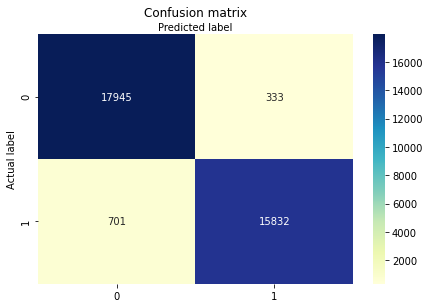

In [0]:
# Construct confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
# Some statistics

# Build array of length y_test with 48% ones, 52% zeroes for climo y_pred
prob_array = np.zeros([100],dtype=int)
prob_array[0:48] = 1
np.random.shuffle(prob_array)
y_pred2 = np.random.choice(prob_array,size=y_test.shape[0])

# create variables of model and climo brier scores to calc brier skill score
bs_m = metrics.brier_score_loss(y_test, y_pred)
bs_c = metrics.brier_score_loss(y_test, y_pred2)
bss = ((bs_c - bs_m)/bs_c)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Logistic Regression Brier Score:", metrics.brier_score_loss(y_test, y_pred))
print("Climatology Brier Score:", metrics.brier_score_loss(y_test, y_pred2))
print("Brier Skill Score:", bss)

Accuracy: 0.9702967452816639
Logistic Regression Brier Score: 0.02970325471833616
Climatology Brier Score: 0.5031455574387407
Brier Skill Score: 0.940964887239509


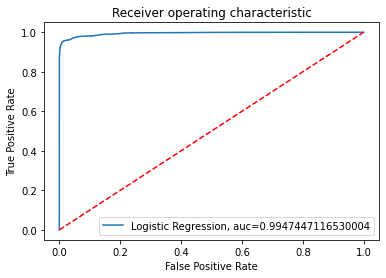

In [0]:
# Plot ROC curve 
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Gaussian Naive Bayes Model

In [0]:
# split dataset into features and target variable
cols = ['wind_direction', 'wind_speed',	'air_temperature', 'dew_point_temperature',	'sea_level_pressure',	'pressure',	'wet_bulb']
X2 = data[cols] #features
y = data.Precipitation_Type # Target variable

# scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X2)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size=0.3,random_state=0)

# creating Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X2_train,y_train)
gnb_y_pred = gnb.predict(X2_test)

In [0]:
prob_array = np.zeros([100],dtype=int)
prob_array[0:49] = 1
np.random.shuffle(prob_array)
clim_y_pred = np.random.choice(prob_array,size=y_test.shape[0])

Text(0.5, 257.44, 'Predicted label')

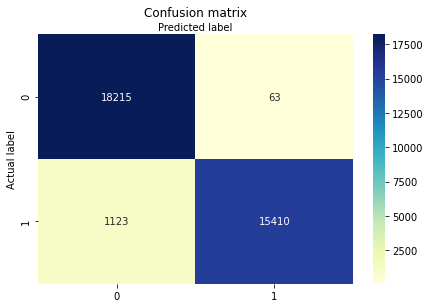

In [0]:
# Construct confusion matrix
from sklearn import metrics
gnb_cnf_matrix = metrics.confusion_matrix(y_test, gnb_y_pred)

# Plot confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(gnb_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
accuracy = metrics.accuracy_score(y_test, gnb_y_pred)
brier_score = metrics.brier_score_loss(y_test, gnb_y_pred)
brier_score_climo = metrics.brier_score_loss(y_test, clim_y_pred)
print("Accuracy:", accuracy)
print("Brier Score:", brier_score)
print("Brier Score (Climo):", brier_score_climo)
print("Brier Skill Score:", 1 - brier_score/brier_score_climo)

Accuracy: 0.9659303093849645
Brier Score: 0.03406969061503548
Brier Score (Climo): 0.5027146591594611
Brier Skill Score: 0.9322285714285714
